In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re

In [ ]:
youtube_comments_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/experience_data/뉴진스_howsweet_유튜브_댓글.csv",encoding='utf-8')
fan_community_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/experience_data/뉴진스더쿠.csv",encoding='utf-8')

# 유튜브 데이터 중 author 중복 제외
youtube_comments_df.drop_duplicates(subset = 'author')
youtube_comments_df = youtube_comments_df[['comment']]

# 정규표현식으로 한글 포함된 댓글만 남기기
pattern = re.compile(r'[ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+')
youtube_comments_df_filtered = youtube_comments_df[youtube_comments_df['comment'].apply(lambda x: bool(pattern.search(x)))]
fan_community_df_filtered= fan_community_df[fan_community_df['제목'].apply(lambda x : bool(pattern.search(x)))]

# <br>을 공백으로 대체
youtube_comments_df_filtered['comment'] = youtube_comments_df_filtered['comment'].str.replace('<br>', ' ', regex=False)

pattern_2 = re.compile(r'[ㄱ-ㅎ|ㅏ-ㅣ|가-힣\s]+')
youtube_comments_df_filtered['comment'] = youtube_comments_df_filtered['comment'].apply(lambda x: ''.join(pattern_2.findall(x)))
fan_community_df_filtered['제목'] = fan_community_df_filtered['제목'].apply(lambda x: ''.join(pattern_2.findall(x)))

<ipython-input-26-3da0246b37fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_comments_df_filtered['comment'] = youtube_comments_df_filtered['comment'].str.replace('<br>', ' ', regex=False)
<ipython-input-26-3da0246b37fb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_comments_df_filtered['comment'] = youtube_comments_df_filtered['comment'].apply(lambda x: ''.join(pattern_2.findall(x)))
<ipython-input-26-3da0246b37fb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy 

# 데이터 전처리

In [ ]:
import nltk
!nltk.download('stopwords')

/bin/bash: line 1: import: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 1: `nltk.download('stopwords')'


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 데이터 다운로드
nltk.download('stopwords')
nltk.download('punkt')  # 단어 토큰화를 위해 필요

# 한글 불용어 목록 정의
korean_stopwords = set([
    '이', '그', '저', '것', '수', '등', '들', '및', '안', '못', '때문', '다른', '어떤', '같은', '그리고',
    '하지만', '또한', '또', '등등', '더', '이미', '대한', '에서', '으로', '에게', '에게는', '도', '을', '를',
    '이', '가', '에', '와', '과', '한', '하고', '보다', '들', '의', '네', '라고', '다', '까', '하며', '하다', '였다','뉴진스','민지','하니','해린','혜인','다니엘','진짜','너무',
    '하이브','뉴진스가','계속','왜','오늘','뉴모닝','단월드','강해린','김민지','팜하니','민희진','중','게','난','뉴진스는','그냥'
])

# 텍스트 정규화 함수
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

# 불용어 제거 및 토큰화 함수
def preprocess_text(text):
    tokens = word_tokenize(clean_text(text))
    tokens = [word for word in tokens if word not in korean_stopwords]
    return tokens

# 텍스트 정규화 및 전처리
youtube_comments_df_filtered['cleaned_comment'] = youtube_comments_df_filtered['comment'].apply(clean_text)
fan_community_df_filtered['cleaned_title'] = fan_community_df_filtered['제목'].apply(clean_text)

youtube_comments_df_filtered['tokens'] = youtube_comments_df_filtered['cleaned_comment'].apply(preprocess_text)
fan_community_df_filtered['tokens'] = fan_community_df_filtered['cleaned_title'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-1ed56a7a5601>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_comments_df_filtered['cleaned_comment'] = youtube_comments_df_filtered['comment'].apply(clean_text)
<ipython-input-27-1ed56a7a5601>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_commun

In [ ]:
import pandas as pd

# 팬 커뮤니티 데이터프레임 로드 (예시)
# fan_community_df = pd.read_csv('/path/to/community_posts.csv')

# 필터링할 단어 목록
keywords = ['좀', '해줘', '해라', '안하냐', '놈들', '소속사', '회사', '뭐하냐']

# 특정 단어가 포함된 데이터만 추출하는 함수
def filter_by_keywords(df, column, keywords):
    pattern = '|'.join(keywords)  # 단어 목록을 정규식 패턴으로 변환
    filtered_df = df[df[column].str.contains(pattern, case=False, na=False)]
    return filtered_df

# 팬 커뮤니티 데이터프레임에서 '제목' 열을 기준으로 필터링
filtered_fan_community_df = filter_by_keywords(fan_community_df, '제목', keywords)

# 결과 확인 (필터링된 데이터프레임 출력)
print(filtered_fan_community_df)

# 필요에 따라 필터링된 데이터프레임을 새로운 csv 파일로 저장할 수도 있음
# filtered_fan_community_df.to_csv('/path/to/save/filtered_community_posts.csv', index=False, encoding='utf-8-sig')


                                        제목
159               요즘 뉴진스에 빠졌는데 영상 좀 찾아주라!!
383               하우스윗 댄스브레이크 짤 좀 줄 버니즈~~~
405                  스밍 방법을 몰라서 그러는데 좀 알려줘
693    뉴진스한테 감긴거같아…재미있는 예능 좀 추천해 줄 수 있어???
714                       왜 애기가 우릴 위로해줘 ㅠㅠ
...                                    ...
10538                     확실히 라방도 좀 편해진거같다
10812                 온판 해줘 임프몰 재입고 해줘 좀!!
10817                        그냥 기다릴테니 온판해줘
10905           뉴진스덕들아 하니 이때 움짤이나 사진좀 줄수있니
11065                       무임승차같아서 좀 찔리지만

[88 rows x 1 columns]


In [ ]:
filtered_fan_community_df.to_csv("뉴진스_fan_filtered.csv",index=False,encoding='utf-8-sig')

In [ ]:

filtered_fan_community_df['cleaned_title'] = filtered_fan_community_df['제목'].apply(clean_text)

filtered_fan_community_df['tokens'] = filtered_fan_community_df['cleaned_title'].apply(preprocess_text)

<ipython-input-21-9814a799e126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fan_community_df['cleaned_title'] = filtered_fan_community_df['제목'].apply(clean_text)
<ipython-input-21-9814a799e126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fan_community_df['tokens'] = filtered_fan_community_df['cleaned_title'].apply(preprocess_text)


In [ ]:
filtered_fan_community_df

,제목,cleaned_title,tokens
159,요즘 뉴진스에 빠졌는데 영상 좀 찾아주라!!,요즘 뉴진스에 빠졌는데 영상 좀 찾아주라,"[요즘, 뉴진스에, 빠졌는데, 영상, 좀, 찾아주라]"
383,하우스윗 댄스브레이크 짤 좀 줄 버니즈~~~,하우스윗 댄스브레이크 짤 좀 줄 버니즈,"[하우스윗, 댄스브레이크, 짤, 좀, 줄, 버니즈]"
405,스밍 방법을 몰라서 그러는데 좀 알려줘,스밍 방법을 몰라서 그러는데 좀 알려줘,"[스밍, 방법을, 몰라서, 그러는데, 좀, 알려줘]"
693,뉴진스한테 감긴거같아…재미있는 예능 좀 추천해 줄 수 있어???,뉴진스한테 감긴거같아 재미있는 예능 좀 추천해 줄 수 있어,"[뉴진스한테, 감긴거같아, 재미있는, 예능, 좀, 추천해, 줄, 있어]"
714,왜 애기가 우릴 위로해줘 ㅠㅠ,왜 애기가 우릴 위로해줘 ㅠㅠ,"[애기가, 우릴, 위로해줘, ㅠㅠ]"
...,...,...,...
10538,확실히 라방도 좀 편해진거같다,확실히 라방도 좀 편해진거같다,"[확실히, 라방도, 좀, 편해진거같다]"
10812,온판 해줘 임프몰 재입고 해줘 좀!!,온판 해줘 임프몰 재입고 해줘 좀,"[온판, 해줘, 임프몰, 재입고, 해줘, 좀]"
10817,그냥 기다릴테니 온판해줘,그냥 기다릴테니 온판해줘,"[기다릴테니, 온판해줘]"
10905,뉴진스덕들아 하니 이때 움짤이나 사진좀 줄수있니,뉴진스덕들아 하니 이때 움짤이나 사진좀 줄수있니,"[뉴진스덕들아, 이때, 움짤이나, 사진좀, 줄수있니]"


In [ ]:
from collections import Counter

# 단어 빈도 계산 함수
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도
community_word_freq = get_word_frequencies(filtered_fan_community_df['tokens'])

# 상위 10개 단어 출력
print(community_word_freq.most_common(100))

[('좀', 40), ('포닝', 9), ('우리', 6), ('해줘', 5), ('회사', 3), ('이거', 3), ('멤버들', 3), ('사진', 3), ('우리애들', 3), ('제발', 3), ('한번만', 3), ('일해라', 3), ('영상', 2), ('줄', 2), ('버니즈', 2), ('알려줘', 2), ('물어봐도', 2), ('해린이', 2), ('될까', 2), ('안녕', 2), ('호감덬인데', 2), ('나도', 2), ('모다니', 2), ('있을까', 2), ('다시', 2), ('혹시', 2), ('보세요', 2), ('근데', 2), ('나', 2), ('ㅠ', 2), ('어도어', 2), ('풀림', 2), ('좋겠어', 2), ('해줘요', 2), ('뭘', 2), ('질문좀', 2), ('뉴진스덕들아', 2), ('빙키봉', 2), ('얼굴좀', 2), ('아니', 2), ('요즘', 1), ('뉴진스에', 1), ('빠졌는데', 1), ('찾아주라', 1), ('하우스윗', 1), ('댄스브레이크', 1), ('짤', 1), ('스밍', 1), ('방법을', 1), ('몰라서', 1), ('그러는데', 1), ('뉴진스한테', 1), ('감긴거같아', 1), ('재미있는', 1), ('예능', 1), ('추천해', 1), ('있어', 1), ('애기가', 1), ('우릴', 1), ('위로해줘', 1), ('ㅠㅠ', 1), ('호감덬', 1), ('뭐', 1), ('되니', 1), ('이제', 1), ('약기운', 1), ('도는거같은데', 1), ('라이트덬인데', 1), ('1집', 1), ('블루북', 1), ('질문', 1), ('해도', 1), ('뭐좀', 1), ('나갈수만', 1), ('있다면', 1), ('뭐라도', 1), ('싶다ㅅㅂ', 1), ('알못인데', 1), ('정보계', 1), ('추천', 1), ('부탁해', 1), ('보정한', 1), ('분', 1), ('계정좀', 1), ('알수'

In [ ]:
fan_community_df_filtered.head()
#youtube_comments_df_filtered.head()

,제목,cleaned_title,tokens
0,박 일 예고,박 일 예고,"[박, 일, 예고]"
1,대퓨님 사녹 관련 답변,대퓨님 사녹 관련 답변,"[대퓨님, 사녹, 관련, 답변]"
2,강해린 자바묵자,강해린 자바묵자,[자바묵자]
3,마이크에 이거 해린이 아니냐고 ㅋㅋㅋㅋ,마이크에 이거 해린이 아니냐고 ㅋㅋㅋㅋ,"[마이크에, 이거, 해린이, 아니냐고, ㅋㅋㅋㅋ]"
4,해린이 첫,해린이 첫,"[해린이, 첫]"


# 단어 빈도분석

In [ ]:
from collections import Counter

# 단어 빈도 계산 함수
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도
youtube_word_freq = get_word_frequencies(youtube_comments_df_filtered['tokens'])
community_word_freq = get_word_frequencies(fan_community_df_filtered['tokens'])

# 상위 10개 단어 출력
print(youtube_word_freq.most_common(100))
print(community_word_freq.most_common(100))


[('댓글', 1435), ('뮤비', 1376), ('노래', 1037), ('뉴진스했다', 959), ('조회수', 893), ('하이브가', 776), ('뉴진스를', 751), ('ㅋㅋ', 751), ('잘', 718), ('연령제한', 682), ('사랑해', 681), ('하는', 658), ('있는', 621), ('화이팅', 616), ('있음', 608), ('지금', 588), ('이렇게', 586), ('좀', 584), ('이제', 561), ('좋다', 560), ('이런', 549), ('지워봐', 545), ('이게', 543), ('슈발', 543), ('ㅋㅋㅋ', 542), ('이번', 518), ('거', 516), ('정말', 503), ('내', 499), ('민희진이', 493), ('컴백뉴진스', 474), ('많이', 469), ('영상', 466), ('쓸거임ㅇㅇ뉴진스가', 465), ('월달에', 463), ('제한', 458), ('보고', 455), ('근데', 438), ('시점', 433), ('좋아요', 420), ('위', 417), ('보면', 415), ('역시', 414), ('만', 412), ('아일릿', 412), ('말고', 405), ('ㅠㅠ', 399), ('ㅋㅋㅋㅋ', 383), ('나', 378), ('조회수가', 377), ('일', 372), ('이건', 365), ('아니', 363), ('우리', 362), ('내가', 360), ('다시', 357), ('항상', 356), ('하이브는', 345), ('뉴진스의', 343), ('ㄷㅅㅂㅈ', 337), ('이거', 332), ('혜인이', 328), ('유튜브', 325), ('했다', 321), ('걸', 318), ('아', 316), ('때문에', 315), ('어떻게', 315), ('하우스윗', 312), ('좋은', 306), ('방시혁', 305), ('어도어', 303), ('기자회견', 303), ('앨범', 

In [ ]:
youtube_word_freq.most_common(50)

[('뮤비', 1637),
 ('댓글', 1509),
 ('노래', 1206),
 ('뉴진스했다', 959),
 ('조회수', 901),
 ('잘', 856),
 ('뉴진스를', 845),
 ('하이브가', 808),
 ('ㅋㅋ', 805),
 ('있는', 798),
 ('사랑해', 771),
 ('하는', 730),
 ('있음', 693),
 ('지금', 687),
 ('이렇게', 687),
 ('연령제한', 682),
 ('좋다', 671),
 ('좀', 668),
 ('화이팅', 652),
 ('이런', 649),
 ('정말', 635),
 ('이게', 626),
 ('거', 609),
 ('이제', 607),
 ('내', 591),
 ('많이', 590),
 ('ㅋㅋㅋ', 586),
 ('이번', 586),
 ('민희진이', 571),
 ('지워봐', 548),
 ('슈발', 543),
 ('근데', 530),
 ('영상', 524),
 ('보고', 517),
 ('보면', 509),
 ('ㅠㅠ', 487),
 ('컴백뉴진스', 474),
 ('ㄷㅅㅂㅈ', 472),
 ('좋아요', 468),
 ('역시', 468),
 ('월달에', 465),
 ('쓸거임ㅇㅇ뉴진스가', 465),
 ('제한', 458),
 ('내가', 450),
 ('시점', 441),
 ('나', 439),
 ('위', 435),
 ('이건', 429),
 ('다시', 428),
 ('아일릿', 427)]

In [ ]:
import pandas as pd
from collections import Counter

# 단어 빈도 계산 함수
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도
youtube_word_freq = get_word_frequencies(youtube_comments_df_filtered['tokens'])
community_word_freq = get_word_frequencies(fan_community_df_filtered['tokens'])

# 상위 100개 단어를 데이터프레임으로 변환
youtube_word_freq_df = pd.DataFrame(youtube_word_freq.most_common(100), columns=['단어', '빈도수'])
community_word_freq_df = pd.DataFrame(community_word_freq.most_common(100), columns=['단어', '빈도수'])

# 결과 출력
print(youtube_word_freq_df.head())
print(community_word_freq_df.head())

# # 데이터프레임을 CSV 파일로 저장 (필요한 경우)
# youtube_word_freq_df.to_csv('/mnt/data/youtube_word_freq.csv', index=False, encoding='utf-8-sig')
# community_word_freq_df.to_csv('/mnt/data/community_word_freq.csv', index=False, encoding='utf-8-sig')


      단어   빈도수
0     댓글  1435
1     뮤비  1376
2     노래  1037
3  뉴진스했다   959
4    조회수   893
    단어  빈도수
0   다니  279
1  해린이  267
2   공트  256
3  인스타  243
4   애들  211


In [ ]:
print(youtube_word_freq_df.tail())
print(community_word_freq_df.tail())

     단어  빈도수
95  얼마나  269
96    개  266
97   없는  262
98   무슨  261
99  아니라  261
       단어  빈도수
95     있어   31
96  인스타그램   31
97     많이   31
98     업뎃   31
99     팜팜   31


# 공출현 행렬 및 1-mode 네트워크 분석

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# 단어 빈도 계산 함수
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도
youtube_word_freq = get_word_frequencies(youtube_comments_df_filtered['tokens'])
community_word_freq = get_word_frequencies(fan_community_df_filtered['tokens'])

# 단어 쌍 공출현 계산 함수
def get_cooccurrence_matrix(tokens_list):
    cooccurrence_counts = Counter()
    for tokens in tokens_list:
        for pair in combinations(tokens, 2):
            cooccurrence_counts[tuple(sorted(pair))] += 1
    return cooccurrence_counts

# 공출현 행렬 생성
youtube_cooccurrence = get_cooccurrence_matrix(youtube_comments_df_filtered['tokens'])
community_cooccurrence = get_cooccurrence_matrix(fan_community_df_filtered['tokens'])

# 공출현 행렬을 데이터프레임으로 변환하는 함수
def cooccurrence_to_dataframe(cooccurrence_counts, min_count):
    filtered_cooccurrence = {pair: count for pair, count in cooccurrence_counts.items() if count >= min_count}
    df = pd.DataFrame(list(filtered_cooccurrence.items()), columns=['Pair', 'Count'])
    df[['Word1', 'Word2']] = pd.DataFrame(df['Pair'].tolist(), index=df.index)
    df = df[['Word1', 'Word2', 'Count']]
    return df

# 공출현 행렬 데이터프레임 생성
min_count_youtube = 280
min_count_community = 40
youtube_cooccurrence_df = cooccurrence_to_dataframe(youtube_cooccurrence, min_count_youtube)
community_cooccurrence_df = cooccurrence_to_dataframe(community_cooccurrence, min_count_community)

# 엑셀 파일로 저장
youtube_cooccurrence_df.to_excel("/path/to/save/youtube_cooccurrence.xlsx", index=False)
community_cooccurrence_df.to_excel("/path/to/save/community_cooccurrence.xlsx", index=False)

# # 네트워크 그래프 생성 함수
# def create_network_graph(cooccurrence_counts, min_count=5):
#     G = nx.Graph()
#     for (word1, word2), count in cooccurrence_counts.items():
#         if count >= min_count:  # 최소 공출현 빈도 기준 필터링
#             G.add_edge(word1, word2, weight=count)
#     return G

# # 네트워크 그래프 생성
# youtube_graph = create_network_graph(youtube_cooccurrence, min_count=280)
# community_graph = create_network_graph(community_cooccurrence, min_count=40)

# # 중심성 계산
# degree_centrality = nx.degree_centrality(youtube_graph)

# # 네트워크 시각화 함수
# def plot_network_graph(G, title, centrality):
#     plt.figure(figsize=(15, 15))
#     pos = nx.spring_layout(G, k=0.1)  # 노드 위치 결정

#     # 노드 크기를 중심성에 따라 조정
#     node_size = [v * 10000 for v in centrality.values()]

#     nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.7)
#     nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
#     nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

#     plt.title(title)
#     plt.show()

# # 유튜브 댓글 네트워크 시각화
# plot_network_graph(youtube_graph, "YouTube Comments Network", degree_centrality)

# # 커뮤니티 게시글 중심성 계산 및 시각화
# degree_centrality_community = nx.degree_centrality(community_graph)
# plot_network_graph(community_graph, "Community Posts Network", degree_centrality_community)



ValueError: Columns must be same length as key

In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# 단어 빈도 계산 함수
def get_word_frequencies(tokens_list):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    return Counter(all_tokens)

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도
youtube_word_freq = get_word_frequencies(youtube_comments_df_filtered['tokens'])
community_word_freq = get_word_frequencies(fan_community_df_filtered['tokens'])

# 단어 쌍 공출현 계산 함수
def get_cooccurrence_matrix(tokens_list):
    cooccurrence_counts = Counter()
    for tokens in tokens_list:
        for pair in combinations(tokens, 2):
            cooccurrence_counts[tuple(sorted(pair))] += 1
    return cooccurrence_counts

# 공출현 행렬 생성
youtube_cooccurrence = get_cooccurrence_matrix(youtube_comments_df_filtered['tokens'])
community_cooccurrence = get_cooccurrence_matrix(fan_community_df_filtered['tokens'])

# 공출현 행렬을 행렬 형식의 데이터프레임으로 변환하는 함수
def cooccurrence_to_matrix(cooccurrence_counts, min_count):
    filtered_cooccurrence = {pair: count for pair, count in cooccurrence_counts.items() if count >= min_count}
    words = set()
    for word1, word2 in filtered_cooccurrence:
        words.add(word1)
        words.add(word2)
    words = sorted(words)

    matrix = pd.DataFrame(0, index=words, columns=words)

    for (word1, word2), count in filtered_cooccurrence.items():
        matrix.at[word1, word2] = count
        matrix.at[word2, word1] = count

    return matrix

# 공출현 행렬 데이터프레임 생성
min_count_youtube = 280
min_count_community = 40
youtube_cooccurrence_matrix = cooccurrence_to_matrix(youtube_cooccurrence, min_count_youtube)
community_cooccurrence_matrix = cooccurrence_to_matrix(community_cooccurrence, min_count_community)

# 엑셀 파일로 저장
youtube_cooccurrence_matrix.to_excel("/content/youtube_cooccurrence_matrix.xlsx")
community_cooccurrence_matrix.to_excel("/content/community_cooccurrence_matrix.xlsx")


In [ ]:
# 단어 빈도수를 데이터프레임으로 변환하는 함수 (필터링 추가)
def word_frequencies_to_dataframe(word_freq, min_freq):
    filtered_word_freq = {word: count for word, count in word_freq.items() if count >= min_freq}
    df = pd.DataFrame(filtered_word_freq.items(), columns=['단어', '빈도수'])
    df = df.sort_values(by='빈도수', ascending=False).reset_index(drop=True)
    return df

# 최소 빈도수 기준 설정
min_freq_youtube = 280  # 예시 값, 필요에 따라 조정
min_freq_community = 40  # 예시 값, 필요에 따라 조정

# 유튜브 댓글과 커뮤니티 게시글의 단어 빈도 데이터프레임 생성 (필터링 적용)
youtube_word_freq_df = word_frequencies_to_dataframe(youtube_word_freq, min_freq_youtube)
community_word_freq_df = word_frequencies_to_dataframe(community_word_freq, min_freq_community)

# 단어 빈도수를 엑셀 파일로 저장
youtube_word_freq_df.to_excel("/content/youtube_word_frequencies.xlsx", index=False)
community_word_freq_df.to_excel("/content/community_word_frequencies.xlsx", index=False)


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 한글 불용어 목록을 리스트로 변환
korean_stopwords_list = list(korean_stopwords)

# TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer(max_features=100, stop_words=korean_stopwords_list, tokenizer=word_tokenize)

# 유튜브 댓글과 커뮤니티 게시글의 TF-IDF 행렬 생성
youtube_tfidf_matrix = vectorizer.fit_transform(youtube_comments_df_filtered['cleaned_comment'])
community_tfidf_matrix = vectorizer.fit_transform(fan_community_df_filtered['cleaned_title'])

# TF-IDF 단어 목록과 점수 출력
youtube_tfidf_scores = pd.DataFrame(youtube_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
community_tfidf_scores = pd.DataFrame(community_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(youtube_tfidf_scores.head())
print(community_tfidf_scores.head())


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


    ㅋㅋ  ㅋㅋㅋ  ㅋㅋㅋㅋ  ㅋㅋㅋㅋㅋ  갑자기  강고양이  강해린    거  고양이  공계짹  ...   포닝  포닝콜   하니  \
0  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    해린  해린이    헐   혜인  혜인이   혠이   혹시  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 100 columns]
    ㅋㅋ  ㅋㅋㅋ      ㅋㅋㅋㅋ  ㅋㅋㅋㅋㅋ  갑자기  강고양이  강해린    거  고양이  공계짹  ...   포닝  포닝콜  \
0  0.0  0.0  0.000000    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.000000    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.000000    0.0  0.0

# 소셜 네트워크 분석

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 네트워크 그래프 생성
G = nx.Graph()

# 유튜브 댓글 네트워크 생성
for tokens in youtube_comments_df_filtered['tokens']:
    for i, token1 in enumerate(tokens):
        for j, token2 in enumerate(tokens):
            if i != j:
                G.add_edge(token1, token2)

# 커뮤니티 게시글 네트워크 생성
for tokens in fan_community_df_filtered['tokens']:
    for i, token1 in enumerate(tokens):
        for j, token2 in enumerate(tokens):
            if i != j:
                G.add_edge(token1, token2)

# 네트워크 시각화
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=50, font_size=8)
plt.show()


KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt

In [ ]:
# 텍스트 전처리: 불용어 제거 및 품사 태깅
okt = Okt()

def preprocess_text(text):
    # 불용어 리스트 (필요에 따라 확장 가능)
    stopwords = ['이', '가', '은', '는', '것', '들', '의', '를', '으로', '에', '와', '한', '하다']

    # 형태소 분석 및 불용어 제거
    tokens = okt.pos(text, stem=True)
    filtered_tokens = [word for word, pos in tokens if pos in ['Noun', 'Verb'] and word not in stopwords]

    return ' '.join(filtered_tokens)

fan_community_df_filtered['processed_content'] = fan_community_df_filtered['제목'].apply(preprocess_text)
youtube_comments_df_filtered['processed_content'] = youtube_comments_df_filtered['comment'].apply(preprocess_text)


<ipython-input-5-ea38f9183646>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_community_df_filtered['processed_content'] = fan_community_df_filtered['제목'].apply(preprocess_text)
<ipython-input-5-ea38f9183646>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_comments_df_filtered['processed_content'] = youtube_comments_df_filtered['comment'].apply(preprocess_text)


In [ ]:
# 데이터 샘플링 (각 1000개씩 추출)
fan_community_sampled = fan_community_df_filtered.sample(n=100, random_state=42)
youtube_comments_sampled = youtube_comments_df_filtered.sample(n=100, random_state=42)

Calculating spring layout: 100%|██████████| 2/2 [00:00<00:00, 262.26it/s]


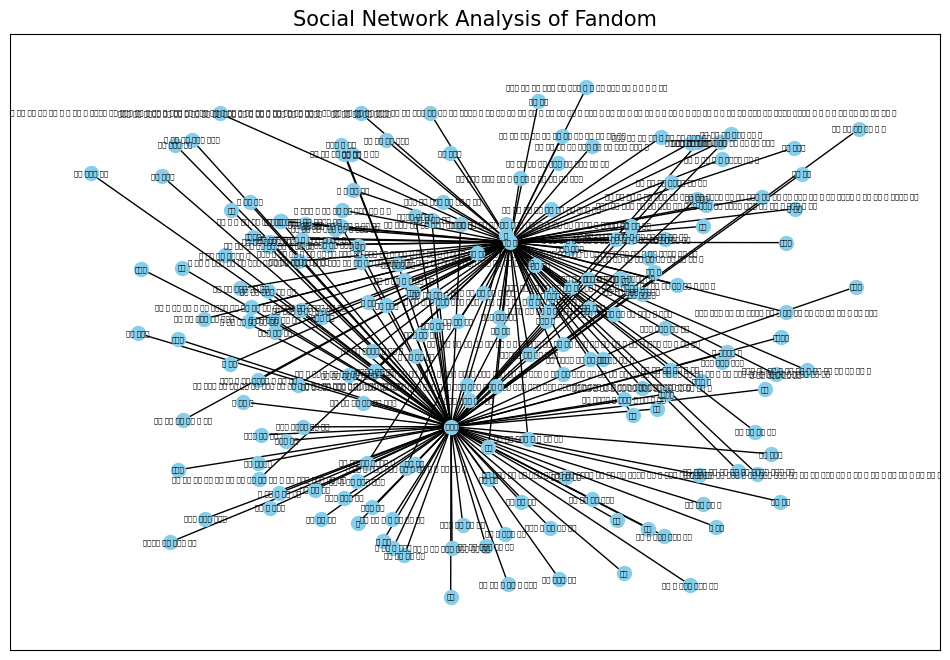

In [ ]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from tqdm import tqdm

# 한글 폰트 설정 (실제 폰트 경로로 변경 필요)
# font_path = 'C:/Windows/Fonts/gulim.ttc'
# fontprop = fm.FontProperties(fname=font_path)

# 소셜 네트워크 그래프 생성
G = nx.Graph()

# 노드 및 엣지 추가 (팬 커뮤니티 데이터)
for index, row in tqdm(fan_community_sampled .iterrows(), total=fan_community_df_filtered.shape[0], desc='Adding fan community nodes and edges'):
    G.add_node(row['processed_content'], type='post_title')
    G.add_edge(row['processed_content'], '팬 커뮤니티')  # 모든 제목을 '팬 커뮤니티' 노드에 연결

# 노드 및 엣지 추가 (유튜브 댓글 데이터)
for index, row in tqdm(youtube_comments_sampled .iterrows(), total=youtube_comments_df_filtered.shape[0], desc='Adding YouTube comment nodes and edges'):
    G.add_node(row['processed_content'], type='comment')
    G.add_edge(row['processed_content'], '유튜브 댓글')  # 모든 댓글을 '유튜브 댓글' 노드에 연결


# Custom spring layout with tqdm
def custom_spring_layout(G, iterations=2):
    pos = nx.random_layout(G)  # 초기 위치를 무작위로 설정
    for i in tqdm(range(iterations), desc='Calculating spring layout'):
        pos = nx.spring_layout(G, pos=pos, iterations=1)  # 한 번의 반복 후 위치 업데이트
    return pos

# 노드와 엣지를 그래프에 추가
pos = custom_spring_layout(G)
plt.figure(figsize=(12, 8))

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')

# 엣지 그리기
nx.draw_networkx_edges(G, pos)

# 노드 레이블 그리기
nx.draw_networkx_labels(G, pos, font_family='NanumGothic', font_size=5)

plt.title('Social Network Analysis of Fandom', fontsize=15)
plt.show()